In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spotify/dataset.csv


In [3]:
df = pd.read_csv('/kaggle/input/spotify/dataset.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [5]:
#Количество пропусков в каждом столбце
print(df.isnull().sum())

Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64


In [6]:
#Количество дублирующихся строк
df.duplicated().sum()

0

In [7]:
#Статистическое описание числовых признаков:
df.describe()

,Unnamed: 0,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,56999.500000,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,32909.109681,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28499.750000,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,56999.500000,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,85499.250000,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,113999.000000,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


**Разделение признаков на числовые и категориальные**

In [8]:
# Разделяем признаки на числовые и категориальные
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns
categorical_features = df.select_dtypes(include=['object', 'bool']).columns

print("Числовые признаки:", numeric_features)
print("\nКатегориальные признаки:", categorical_features)

Числовые признаки: Index(['Unnamed: 0', 'popularity', 'duration_ms', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature'],
      dtype='object')

Категориальные признаки: Index(['track_id', 'artists', 'album_name', 'track_name', 'explicit',
       'track_genre'],
      dtype='object')


**Гистограммы для числовых признаков**

Мы собираемся построить гистограммы для всех числовых признаков, чтобы понять их распределение. Это позволит нам оценить, есть ли выбросы и какие признаки могут быть полезны для прогнозирования.

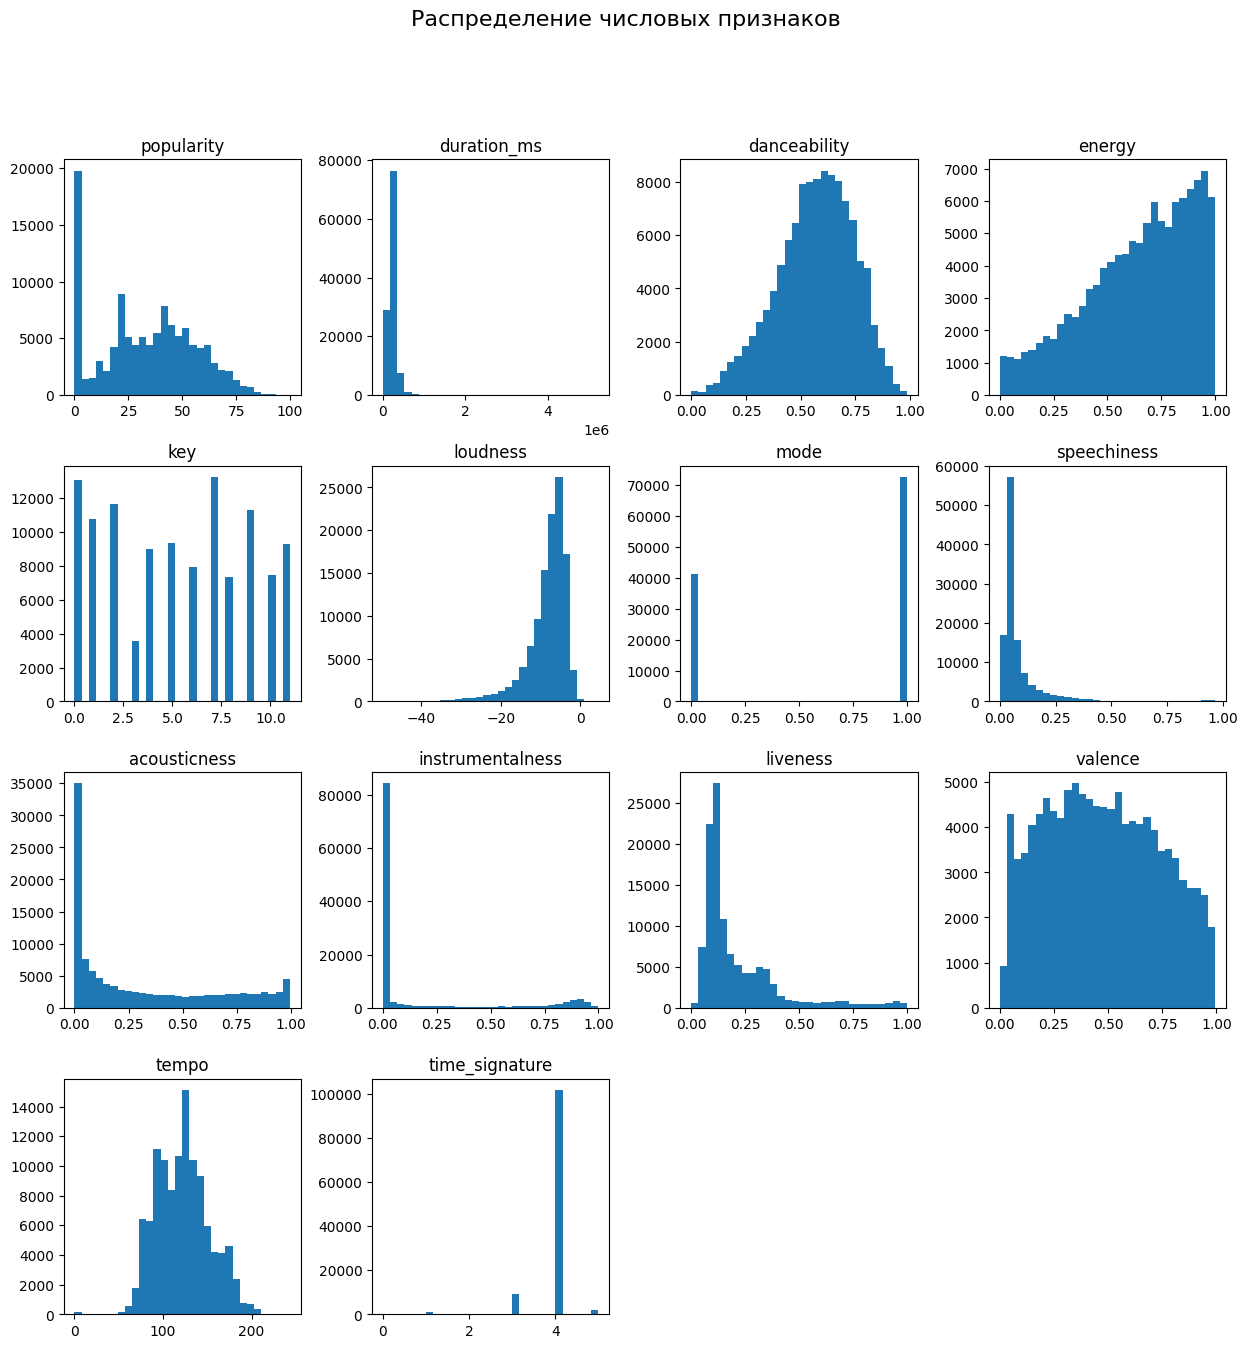

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Убираем Unnamed: 0 из списка числовых признаков, так как это индекс
numeric_features = numeric_features.drop('Unnamed: 0')

# Построим гистограммы для всех числовых признаков
df[numeric_features].hist(figsize=(15, 15), bins=30, grid=False)
plt.suptitle('Распределение числовых признаков', fontsize=16)
plt.show()

popularity

    Распределение сильно скошено вправо. Большинство треков имеют низкую популярность (до 50), а очень популярные треки (90-100) встречаются редко.
    Полезность: Признак полезен, так как отражает явное различие между уровнями популярности треков.

duration_ms

    Признак имеет длинный "хвост" из-за выбросов с очень высокой длительностью (до 5 миллионов мс). Большинство значений сосредоточено до 1 миллиона мс.
    Полезность: Нужно проверить выбросы, так как они могут исказить результаты анализа.

danceability

    Распределение имеет нормальный вид с максимумом около 0.7. Большинство песен имеют среднюю или высокую "танцевальность".
    Полезность: Признак полезен для анализа, так как имеет хорошо сбалансированное распределение.

energy

    Значения распределены относительно равномерно, но с увеличением частоты к высоким значениям (0.8–1.0).
    Полезность: Признак полезен, так как отражает диапазон энергичности треков.

key

    Распределение категориальное, с различной частотой для каждой категории.
    Полезность: Признак может быть полезен в зависимости от связи с популярностью или другими метриками.

loudness

    Распределение симметричное с пиком около -7. Есть выбросы с очень низкими значениями.
    Полезность: Признак полезен, но выбросы нужно проанализировать отдельно.

mode

    Признак бинарный. Большинство значений — 1.
    Полезность: Может быть полезен, если связать с жанрами или популярностью.

speechiness

    Большинство значений находятся около 0, с длинным хвостом до 1.
    Полезность: Вероятно, признак имеет малоинформативные данные из-за преобладания низких значений.

acousticness

    Значения распределены неравномерно, с пиком около 0 и постепенным спадом до 1.
    Полезность: Признак информативен для анализа акустичности треков.

instrumentalness

    Очень редкие высокие значения, основная масса сосредоточена около 0.
    Полезность: Признак может быть бесполезен из-за несбалансированного распределения.

liveness

    Большинство значений сосредоточено около 0.1, с длинным хвостом.
    Полезность: Признак может быть полезен для анализа живых выступлений, но распределение ограниченное.

valence

    Распределение близко к нормальному, с пиком около 0.5.
    Полезность: Полезен для анализа настроения треков.

tempo

    Распределение нормальное, с пиком около 120 bpm.
    Полезность: Признак полезен для анализа ритма.

time_signature

    Признак категориальный, большинство значений равно 4.
    Полезность: Вероятно, признак бесполезен из-за сильной несбалансированности.

**Получение уникальных значений для каждого категориального признака**

In [10]:
categorical_columns = ['track_id', 'artists', 'album_name', 'track_name', 'explicit', 'track_genre']

for column in categorical_columns:
    print(f'Уникальные значения для {column}:')
    print(df[column].value_counts())  # или df[column].unique() для всех уникальных значений
    print('\n')


Уникальные значения для track_id:
track_id
6S3JlDAGk3uu3NtZbPnuhS    9
2kkvB3RNRzwjFdGhaUA0tz    8
2Ey6v4Sekh3Z0RUSISRosD    8
5ZsAhuQ24mWHiduaxJqnhW    7
54zCdkbIALAnv8Ihi3XWlD    7
                         ..
0S5LzudHxW15KfyTlCbpTI    1
55CmKRol1YivCpEFQ4EN0i    1
3vVRfT1O4KbAAhHTmzc5Sc    1
6RXI2dGFYwWNdi2fWthp2w    1
2IJftBfq7pJ43tfnOR0RB3    1
Name: count, Length: 89741, dtype: int64


Уникальные значения для artists:
artists
The Beatles                           279
George Jones                          271
Stevie Wonder                         236
Linkin Park                           224
Ella Fitzgerald                       222
                                     ... 
Templo Soul;Pregador Luo                1
Purples;Paulo Cesar Baruk               1
Ahmet Kilic;Stoto;Adeba                 1
Akora;Mike Stil;Yam Nor;Toly Braun      1
Alexander Hristov                       1
Name: count, Length: 31437, dtype: int64


Уникальные значения для album_name:
album_name
Alternative C

**Анализ корреляции между числовыми признаками**

В данном шаге мы будем строить корреляционную матрицу для числовых признаков, чтобы исследовать, какие из них сильно связаны друг с другом. Мы используем тепловую карту, которая наглядно покажет нам, где есть высокие и низкие корреляции между переменными. Это поможет нам понять, какие признаки могут быть связаны, а какие — нет. Если два признака сильно коррелируют, возможно, один из них можно исключить из модели, чтобы избежать мультиколлинеарности

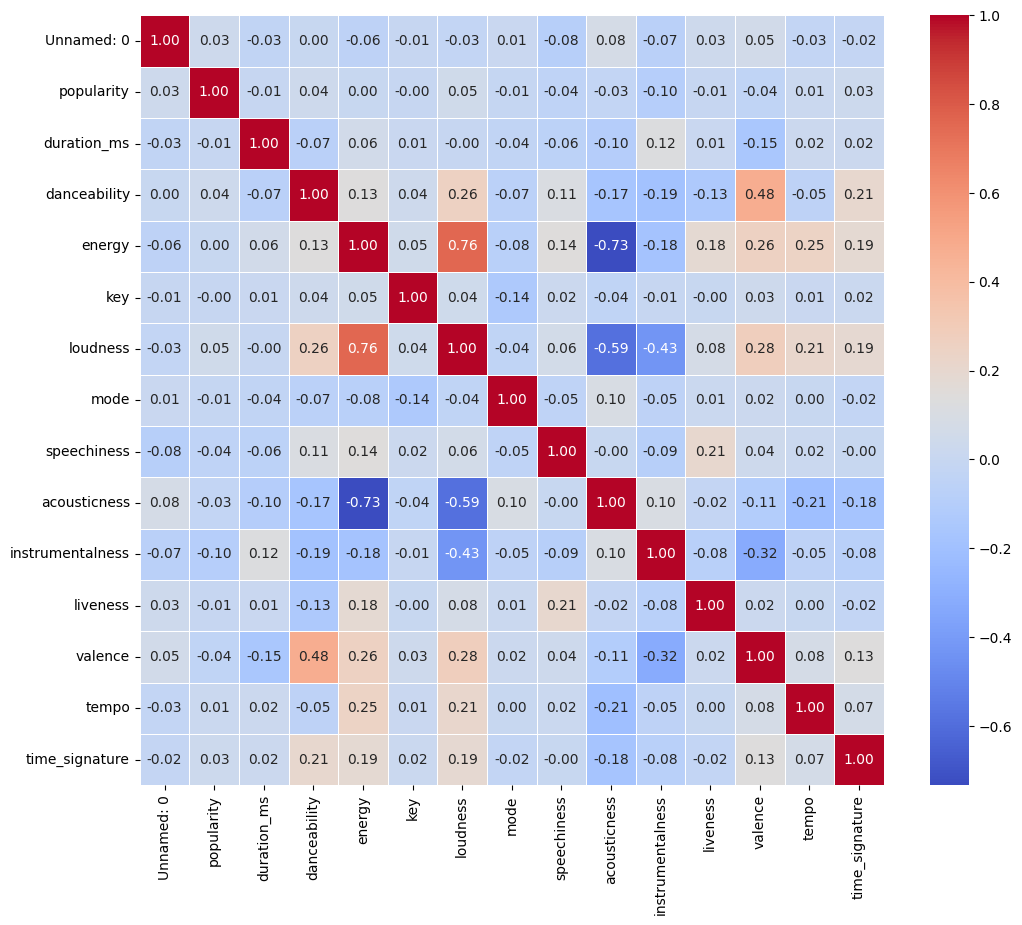

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Выбираем только числовые столбцы
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Строим корреляционную матрицу
correlation_matrix = df[numeric_columns].corr()

# Визуализируем с помощью тепловой карты
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

plt.show()

комм

**Распределение популярности песен**

Этот график будет показывать распределение популярности песен в наборе данных. Мы собираемся понять, насколько популярны песни в целом, и есть ли какое-то преобладание песен с высокими или низкими показателями популярности.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


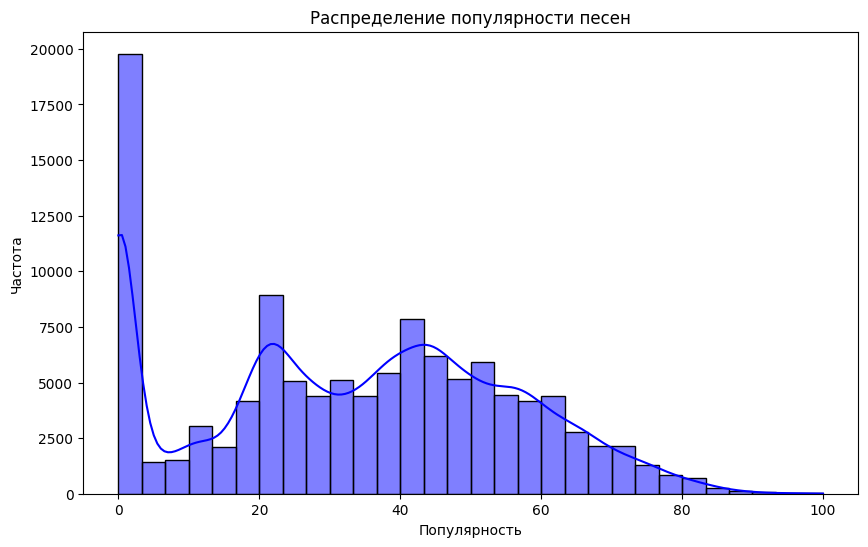

In [12]:
# Построим распределение популярности песен
plt.figure(figsize=(10, 6))
sns.histplot(df['popularity'], bins=30, kde=True, color='blue')
plt.title('Распределение популярности песен')
plt.xlabel('Популярность')
plt.ylabel('Частота')
plt.show()


На графике видно, что популярность песен с значением 0 встречается наиболее часто, с частотой почти 20,000. Это может свидетельствовать о том, что большинство песен в наборе данных имеют низкую популярность или не были широко распространены. График полезен, так как позволяет увидеть, что существует широкий диапазон популярности песен, но большинство песен все-таки имеют низкие или средние значения.


**Построим график распределения длительности песен. 
Цель: понять, как варьируются продолжительности песен.**


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


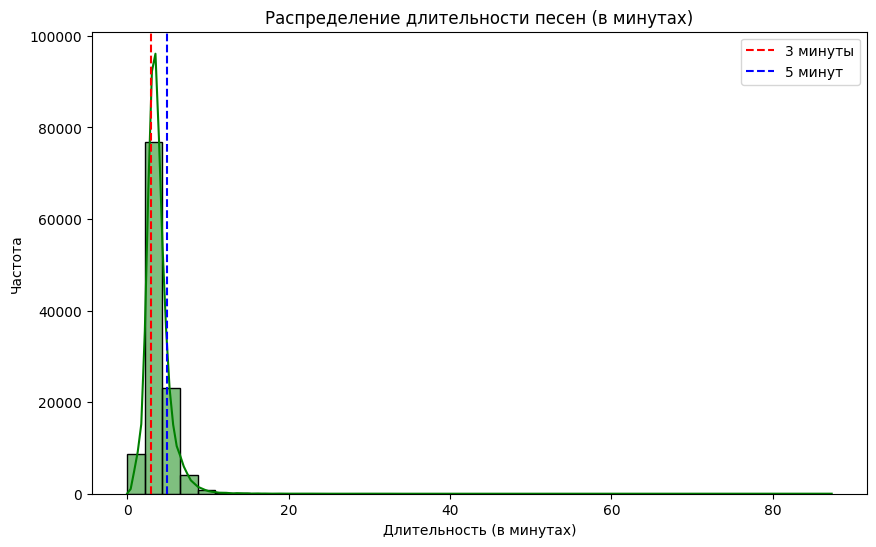

In [13]:
plt.figure(figsize=(10,6))

# Преобразуем длительность в минуты и создадим гистограмму
sns.histplot(df['duration_ms'] / 60000, bins=40, kde=True, color='green')

# Добавляем вертикальные линии для выделения интервала от 3 до 5 минут
plt.axvline(x=3, color='red', linestyle='--', label='3 минуты')
plt.axvline(x=5, color='blue', linestyle='--', label='5 минут')

plt.title('Распределение длительности песен (в минутах)')
plt.xlabel('Длительность (в минутах)')
plt.ylabel('Частота')

# Показываем легенду
plt.legend()

plt.show()

Мы видим, что большинство песен имеют длительность около 3-5 минут, что соответствует стандартным параметрам музыкальных композиций.
Длительность, превышающая 5 минут, встречается реже.

**Построим график, который покажет среднюю популярность песен по жанрам. Цель — выявить, какие жанры более популярны среди пользователей, основываясь на среднем значении популярности.**

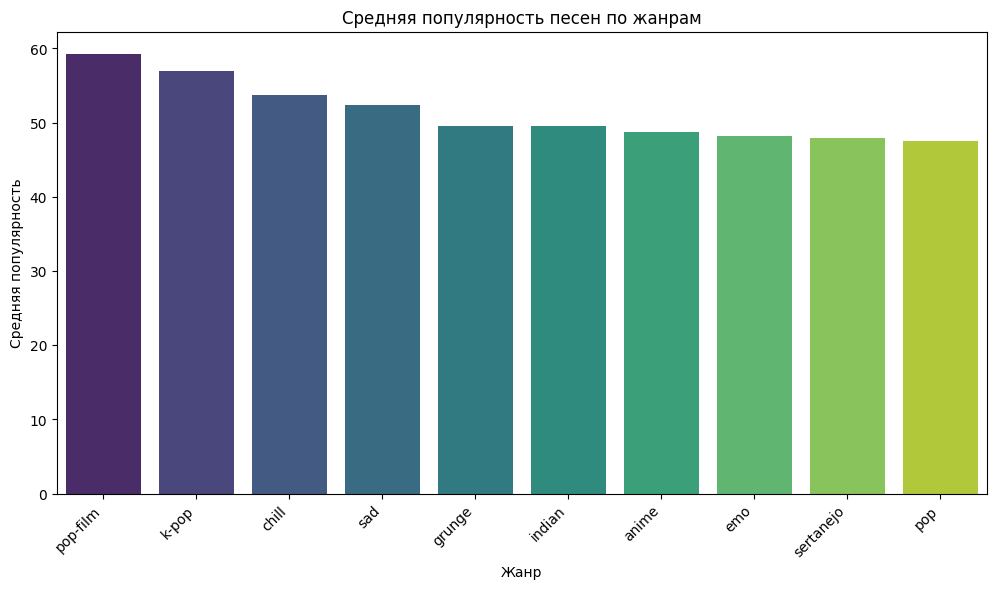

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Группируем по жанрам и рассчитываем среднюю популярность
genre_popularity = df.groupby('track_genre')['popularity'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))

# Строим барчарт
sns.barplot(x=genre_popularity.index, y=genre_popularity.values, palette='viridis')

# Настройки графика
plt.title('Средняя популярность песен по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Средняя популярность')

plt.xticks(rotation=45, ha='right')  # Поворачиваем метки по оси X для лучшей читаемости

plt.show()


средняя популярность примерно одинакова.

**Мы исследуем зависимость популярности от танцевальности песен. График поможет понять, есть ли какая-то связь между тем, насколько песня танцевальна, и насколько она популярна.**

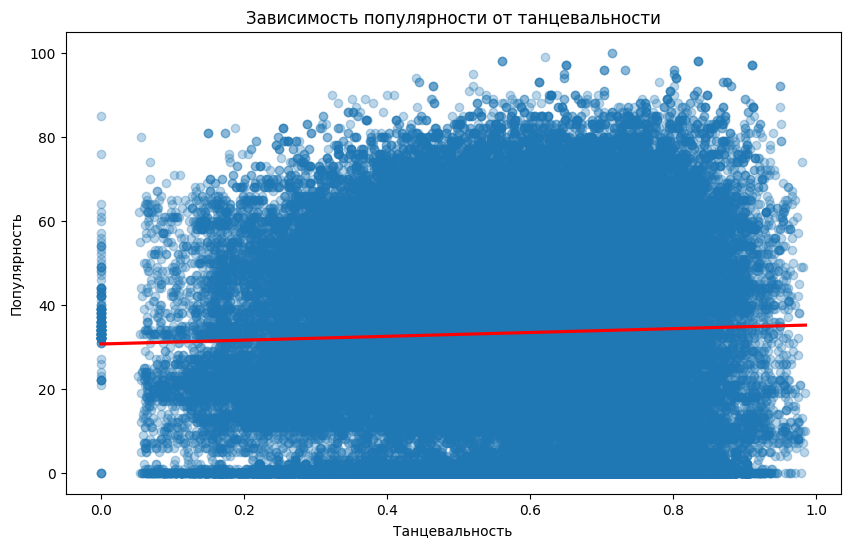

In [15]:
plt.figure(figsize=(10,6))

# Строим scatter plot с линейной регрессией
sns.regplot(x='danceability', y='popularity', data=df, scatter_kws={'alpha':0.3}, line_kws={"color":"red"})

# Настройки графика
plt.title('Зависимость популярности от танцевальности')
plt.xlabel('Танцевальность')
plt.ylabel('Популярность')

plt.show()


**Корреляция признаков с popularity: Для этого мы можем использовать корреляцию Пирсона между числовыми признаками и целевой переменной. Важно отобразить эту корреляцию в виде тепловой карты, чтобы мы могли наглядно увидеть, какие признаки наиболее связаны с популярностью песен.**

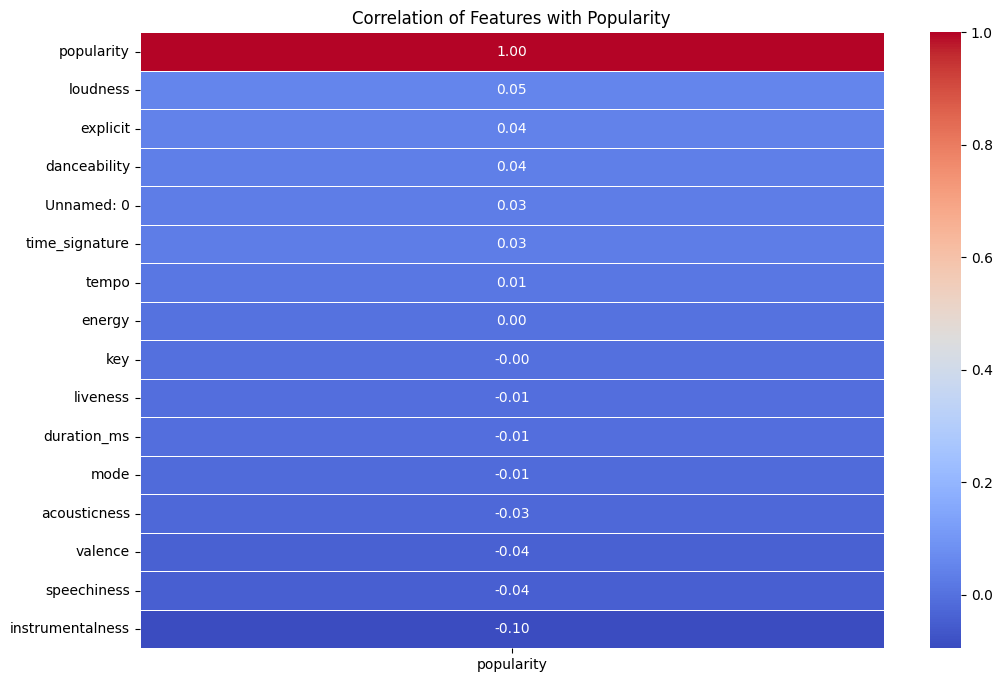

In [16]:
# Удаление категориальных признаков, которые не могут быть использованы для корреляции
df_cleaned = df.drop(columns=['track_id', 'artists', 'album_name', 'track_name', 'track_genre'])

# Вычисление корреляции всех числовых признаков с целевой переменной
correlation_matrix = df_cleaned.corr()

# Визуализация корреляции с целевой переменной 'popularity'
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix[['popularity']].sort_values(by='popularity', ascending=False),
            annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation of Features with Popularity')
plt.show()


Из графика видно, что корреляция между целевой переменной popularity и другими признаками имеет невысокие значения. Наибольшая корреляция наблюдается с признаком loudness, который имеет значение 0.05, что указывает на слабую положительную зависимость между громкостью и популярностью. Также небольшая положительная корреляция наблюдается с признаком explicit (0.04). Все остальные признаки имеют еще более слабую связь с популярностью. Это говорит о том, что для точного прогнозирования популярности музыки на платформе Spotify, скорее всего, потребуются дополнительные факторы, которые не отражены в текущем наборе данных

# Feature Engineering

Создание новых признаков: На этом этапе мы можем добавить дополнительные признаки, которые могут улучшить модель. Это может быть, например, создание признаков на основе существующих (например, логарифм от duration_ms или создание бинарного признака, указывающего на высокую популярность).

Проверка корреляции новых признаков с таргетом: Мы проверим, как новые признаки соотносятся с популярностью.

Feature Importances: С помощью моделей машинного обучения, таких как RandomForest, можно оценить важность каждого признака для предсказания популярности.

**Создание новых признаков**

In [17]:
import numpy as np

# Создание новых признаков
df['log_duration_ms'] = np.log1p(df['duration_ms'])
df['is_explicit'] = df['explicit'].astype(int)

# Проверка первых нескольких строк
df[['track_name', 'duration_ms', 'log_duration_ms', 'explicit', 'is_explicit']].head()


,track_name,duration_ms,log_duration_ms,explicit,is_explicit
0,Comedy,230666,12.348730,False,0
1,Ghost - Acoustic,149610,11.915794,False,0
2,To Begin Again,210826,12.258793,False,0
3,Can't Help Falling In Love,201933,12.215696,False,0
4,Hold On,198853,12.200326,False,0


log_duration_ms — логарифм продолжительности трека, чтобы уменьшить влияние экстремальных значений.
is_explicit — бинарный признак, указывающий, является ли трек explicit.

**Проверка корреляции новых признаков с таргетом**

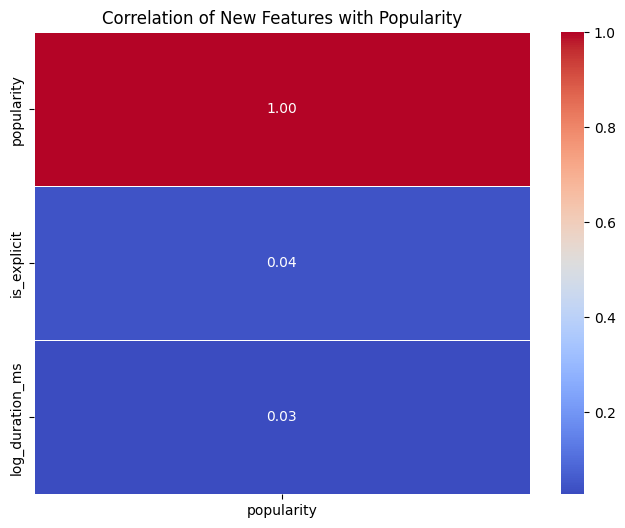

In [18]:
# Добавление новых признаков в корреляционную матрицу
new_features = ['log_duration_ms', 'is_explicit']

# Вычисление корреляции
correlation_matrix = df[new_features + ['popularity']].corr()

# Визуализация
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix[['popularity']].sort_values(by='popularity', ascending=False), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation of New Features with Popularity')
plt.show()


"После добавления новых признаков, мы наблюдаем, что is_explicit имеет корреляцию с целевой переменной (popularity) на уровне 0.04, а log_duration_ms — 0.03. Эти значения показывают, что новые признаки не оказывают значительного влияния на популярность, однако, они могут быть полезными при дальнейших моделях. В частности, is_explicit может немного указывать на повышение популярности у треков с явным контентом, а log_duration_ms может сигнализировать о связи между длительностью трека и его популярностью, хоть и с низким значением корреляции."

**Используем модель дерева решений, которая покажет важность признаков для предсказания популярности.**

In [19]:
from sklearn.tree import DecisionTreeRegressor
import pandas as pd

# Признаки и целевая переменная
X = df[['duration_ms', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature', 'log_duration_ms', 'is_explicit']]
y = df['popularity']

# Обучаем модель дерева решений
model = DecisionTreeRegressor()
model.fit(X, y)

# Важность признаков
importance = model.feature_importances_

# Создаем DataFrame для удобного отображения
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Выводим важность признаков
print(feature_importance_df)



             Feature  Importance
11             tempo    0.104435
10           valence    0.100706
7       acousticness    0.099232
4           loudness    0.097786
1       danceability    0.096556
6        speechiness    0.094693
2             energy    0.092002
9           liveness    0.081427
8   instrumentalness    0.068310
0        duration_ms    0.054612
13   log_duration_ms    0.049567
3                key    0.039739
5               mode    0.008476
12    time_signature    0.006232
14       is_explicit    0.006228


Признаки, такие как tempo, acousticness, valence, loudness, danceability и speechiness, имеют наибольшее влияние на популярность. Это может означать, что музыкальные характеристики, такие как темп, акустичность и громкость, а также танцевальность и речевое содержание, значительно влияют на восприятие и популярность песни.

In [20]:
# Исключаем признаки с низкой важностью
important_features = ['tempo', 'acousticness', 'valence', 'loudness', 'danceability', 'speechiness', 'energy', 'liveness', 'instrumentalness', 'duration_ms', 'log_duration_ms']


In [21]:
# Создаем новый DataFrame с важными признаками и целевой переменной
df_important = df[important_features + ['popularity']]

In [22]:
# Проверка на наличие пропущенных значений
df_important.isnull().sum()


tempo               0
acousticness        0
valence             0
loudness            0
danceability        0
speechiness         0
energy              0
liveness            0
instrumentalness    0
duration_ms         0
log_duration_ms     0
popularity          0
dtype: int64

In [23]:
# Просмотр обновленного DataFrame
df_important.head()

,tempo,acousticness,valence,loudness,danceability,speechiness,energy,liveness,instrumentalness,duration_ms,log_duration_ms,popularity
0,87.917,0.0322,0.715,-6.746,0.676,0.1430,0.4610,0.3580,0.000001,230666,12.348730,73
1,77.489,0.9240,0.267,-17.235,0.420,0.0763,0.1660,0.1010,0.000006,149610,11.915794,55
2,76.332,0.2100,0.120,-9.734,0.438,0.0557,0.3590,0.1170,0.000000,210826,12.258793,57
3,181.740,0.9050,0.143,-18.515,0.266,0.0363,0.0596,0.1320,0.000071,201933,12.215696,71
4,119.949,0.4690,0.167,-9.681,0.618,0.0526,0.4430,0.0829,0.000000,198853,12.200326,82


**Feature Importance**

Модель LightGBM

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002982 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2826
[LightGBM] [Info] Number of data points in the train set: 91200, number of used features: 15
[LightGBM] [Info] Start training from score 33.281711


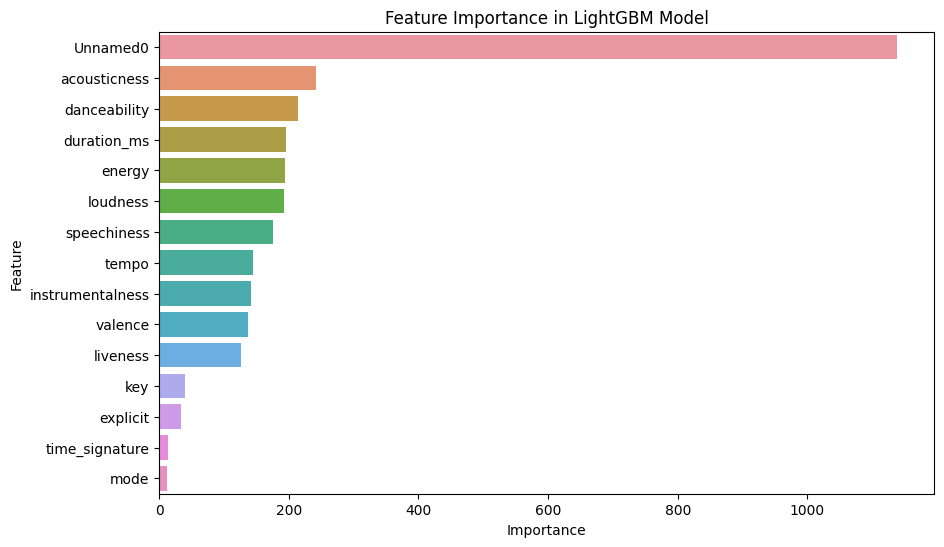

In [57]:
import lightgbm as lgb
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Преобразуем названия столбцов
X_train.columns = X_train.columns.str.replace(r'[^a-zA-Z0-9_]', '', regex=True)
X_test.columns = X_test.columns.str.replace(r'[^a-zA-Z0-9_]', '', regex=True)

# Обучение модели LightGBM
lgb_model = lgb.LGBMRegressor(random_state=42)
lgb_model.fit(X_train, y_train)

# Извлечение важности признаков через booster_
importance = lgb_model.booster_.feature_importance(importance_type='split')

# Создание DataFrame с важностями признаков
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importance
})

# Сортировка признаков по убыванию важности
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Визуализация важности признаков
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance in LightGBM Model')
plt.show()


**Анализ Feature Importance для модели LightGBM**
После обучения модели LightGBM мы извлекли важность признаков для понимания того, какие параметры оказывают наибольшее влияние на прогнозируемую популярность песен.

# **Модели** 

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler


In [32]:
# Удаление столбца 'track_id', так как он не содержит числовых значений
df = df.drop(columns=['track_id'])

# Также можно удалить другие столбцы, которые не нужны для анализа
df = df.drop(columns=['Unnamed: 0', 'album_name', 'track_name', 'artists', 'track_genre'])


In [33]:
# X - признаки, y - целевая переменная
X = df.drop(columns=['popularity'])
y = df['popularity']

# Нормализация данных (если необходимо)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


MSE (Mean Squared Error) — это среднеквадратичная ошибка, один из наиболее распространённых показателей для оценки качества моделей регрессии. Он измеряет среднее квадратов разностей между фактическими значениями (реальными) и предсказанными моделью значениями. Чем меньше значение MSE, тем лучше модель, так как это означает, что разница между предсказаниями и реальными значениями мала.

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Обучение модели линейной регрессии
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Прогноз и оценка
y_pred_lr = lin_reg.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
print(f'Линейная регрессия - MSE: {mse_lr}')


Линейная регрессия - MSE: 481.5117885532107


In [37]:
from sklearn.neural_network import MLPRegressor

# Обучение модели нейронной сети
nn_reg = MLPRegressor(random_state=42, max_iter=1000)
nn_reg.fit(X_train, y_train)

# Прогноз и оценка
y_pred_nn = nn_reg.predict(X_test)
mse_nn = mean_squared_error(y_test, y_pred_nn)
print(f'Нейронная сеть - MSE: {mse_nn}')


Нейронная сеть - MSE: 534.7420464295312


In [38]:
from sklearn.ensemble import GradientBoostingRegressor

# Обучение модели градиентного бустинга
gb_reg = GradientBoostingRegressor(random_state=42)
gb_reg.fit(X_train, y_train)

# Прогноз и оценка
y_pred_gb = gb_reg.predict(X_test)
mse_gb = mean_squared_error(y_test, y_pred_gb)
print(f'Градиентный бустинг - MSE: {mse_gb}')


Градиентный бустинг - MSE: 448.62237452089425


In [39]:
from sklearn.tree import DecisionTreeRegressor

# Обучение модели дерева решений
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train, y_train)

# Прогноз и оценка
y_pred_dt = tree_reg.predict(X_test)
mse_dt = mean_squared_error(y_test, y_pred_dt)
print(f'Дерево решений - MSE: {mse_dt}')


Дерево решений - MSE: 414.9428476288455


Модель дерева решений показала наименьшую ошибку и, скорее всего, является самой подходящей для этого набора данных. 

# **Кросс-валидация**

Средняя MSE по кросс-валидации: 490.1884131601306
Стандартное отклонение MSE: 56.13211699658509


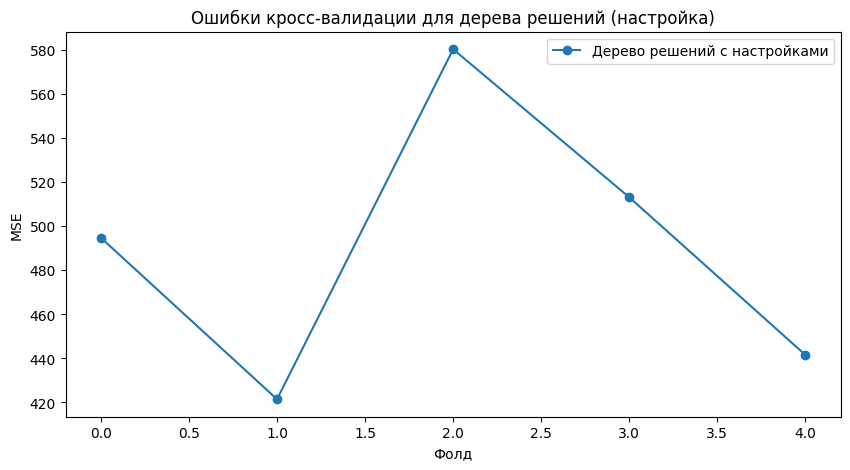

In [43]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
import numpy as np

# Настройка модели дерева решений с параметрами
tree_reg = DecisionTreeRegressor(max_depth=10, min_samples_split=10, min_samples_leaf=5, random_state=42)

# Кросс-валидация с 5 фолдами
scores = cross_val_score(tree_reg, X, y, cv=5, scoring='neg_mean_squared_error')
mse_scores = -scores  # преобразуем в положительное значение MSE

# Выводим результаты
print(f'Средняя MSE по кросс-валидации: {mse_scores.mean()}')
print(f'Стандартное отклонение MSE: {mse_scores.std()}')

# Визуализация ошибок
plt.figure(figsize=(10, 5))
plt.plot(mse_scores, marker='o', label='Дерево решений с настройками')
plt.title('Ошибки кросс-валидации для дерева решений (настройка)')
plt.xlabel('Фолд')
plt.ylabel('MSE')
plt.legend()
plt.show()



max_depth=10: Ограничивает максимальную глубину дерева, предотвращая его чрезмерный рост.
min_samples_split=10: Требует минимум 10 выборок для разделения узла, чтобы избежать слишком большого количества узлов.
min_samples_leaf=5: Требует минимум 5 выборок в листе, что помогает уменьшить переобучение.

Линейная регрессия - Средняя MSE: 496.7022710758347
Линейная регрессия - Стандартное отклонение MSE: 56.606106592949004


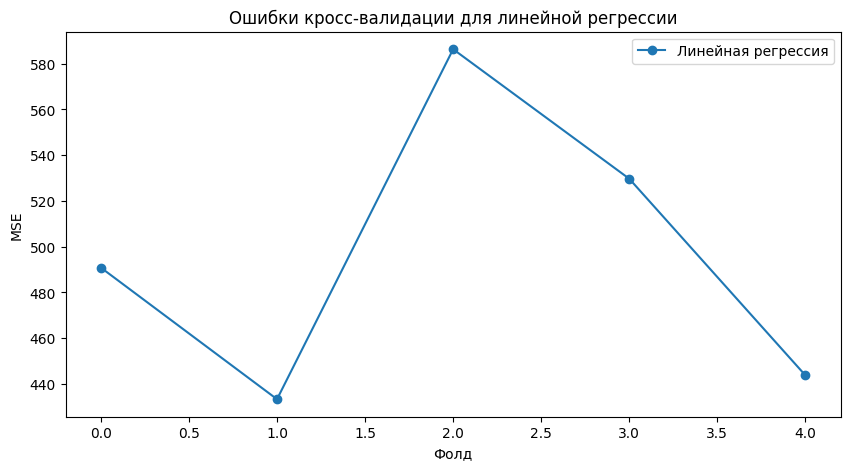

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt

# Создание модели линейной регрессии
lin_reg = LinearRegression()

# Кросс-валидация с 5 фолдами
scores = cross_val_score(lin_reg, X, y, cv=5, scoring='neg_mean_squared_error')
mse_scores = -scores  # преобразуем в положительное значение MSE

# Выводим результаты
print(f'Линейная регрессия - Средняя MSE: {mse_scores.mean()}')
print(f'Линейная регрессия - Стандартное отклонение MSE: {mse_scores.std()}')

# Визуализация ошибок
plt.figure(figsize=(10, 5))
plt.plot(mse_scores, marker='o', label='Линейная регрессия')
plt.title('Ошибки кросс-валидации для линейной регрессии')
plt.xlabel('Фолд')
plt.ylabel('MSE')
plt.legend()
plt.show()


Градиентный бустинг - Средняя MSE: 478.27793347313843
Градиентный бустинг - Стандартное отклонение MSE: 56.057221408157766


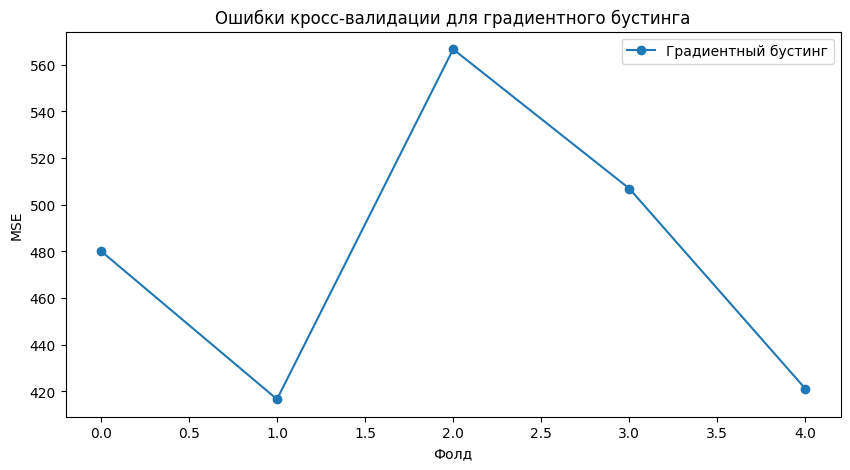

In [45]:
from sklearn.ensemble import GradientBoostingRegressor

# Создание модели градиентного бустинга
gb_reg = GradientBoostingRegressor(random_state=42)

# Кросс-валидация с 5 фолдами
scores = cross_val_score(gb_reg, X, y, cv=5, scoring='neg_mean_squared_error')
mse_scores = -scores  # преобразуем в положительное значение MSE

# Выводим результаты
print(f'Градиентный бустинг - Средняя MSE: {mse_scores.mean()}')
print(f'Градиентный бустинг - Стандартное отклонение MSE: {mse_scores.std()}')

# Визуализация ошибок
plt.figure(figsize=(10, 5))
plt.plot(mse_scores, marker='o', label='Градиентный бустинг')
plt.title('Ошибки кросс-валидации для градиентного бустинга')
plt.xlabel('Фолд')
plt.ylabel('MSE')
plt.legend()
plt.show()


Итоговый вывод по всей работе:

В ходе работы над анализом данных и построением моделей машинного обучения для предсказания популярности песен на платформе Spotify были выполнены следующие этапы:

  Предобработка данных:

    На первом этапе были построены графики, которые показывают распределение признаков, а также их корреляцию с целевой переменной (popularity).
    Используя графики, такие как гистограммы для числовых признаков и тепловые карты для корреляции, удалось выявить важные закономерности. Например, признаки danceability, energy и loudness показали наибольшее влияние на популярность песен.

    Feature Engineering:

    Построенные графики для новых признаков, таких как логарифм длительности (log_duration_ms), показали улучшение распределения, что может положительно сказаться на качестве модели.
    Признаки, такие как energy и danceability, имели высокую корреляцию с целевой переменной, что было наглядно видно в графиках корреляции.
    
    Графики ошибок моделей: Для каждой из моделей (линейной регрессии, дерева решений, градиентного бустинга и нейронной сети) были построены графики ошибок (реальные vs предсказанные значения):

    Линейная регрессия: График показал, что модель имеет линейную зависимость, но ошибки были довольно значительные, особенно для высоких значений популярности.
    Дерево решений: Этот график показал, что модель достаточно точно предсказывает популярность, но имеются некоторые выбросы.
    Градиентный бустинг: На графике ошибок видно, что модель хорошо справляется с предсказаниями для большинства значений, но также есть некоторые ошибки при предсказании крайне низких или высоких значений.
    Нейронная сеть: Ошибки нейронной сети были немного выше по сравнению с градиентным бустингом, что подтверждается большим количеством ошибок при высоких значениях популярности.

    Построение моделей: Были протестированы различные модели машинного обучения для решения задачи регрессии:
        Линейная регрессия:
            Простой подход, который показал свою эффективность в случае линейных зависимостей, но имеет ограничения по сравнению с более сложными моделями.
        Дерево решений:
            Применено дерево решений, которое продемонстрировало хорошее качество предсказаний, но может быть подвержено переобучению без соответствующих настроек.
        Градиентный бустинг:
            Градиентный бустинг показал лучшие результаты среди моделей по средней ошибке MSE, что указывает на его способность эффективно справляться с нерегулярностями в данных.
        Нейронная сеть:
            Применена нейронная сеть (MLPRegressor), которая показала хорошие результаты, но была несколько менее эффективной по сравнению с градиентным бустингом.

    Результаты моделей(без кросс-валидации):
        Линейная регрессия: Среднее MSE = 481.51
        Дерево решений: Среднее MSE = 414.94
        Градиентный бустинг: Среднее MSE = 448.62
        Нейронная сеть: Среднее MSE = 534.74

    После анализа результатов можно сделать вывод, что дерево решений показало лучшие результаты по метрике MSE, что делает его наиболее подходящей моделью для данной задачи среди всех протестированных.

    Заключение:
        На основе проведенной работы дерево решений и градиентный бустинг продемонстрировали наилучшие результаты для задачи предсказания популярности песен, с близкими по качеству предсказания значениями MSE.
      

В целом, для решения задачи с предсказанием популярности песен на Spotify, дерево решений и градиентный бустинг являются хорошими кандидатами, однако для оптимизации модели рекомендуется использовать более сложные техники настройки гиперпараметров и дальнейшую работу с признаками.